# import the main library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly_express as px
import klib
import seaborn as sns

In [2]:
def plot_pie_barchar(df,var,title=''):
    plt.figure(figsize=(25,10))

    #pie chart (left subplot)
    plt.subplot(121)
    label_list=list(df[var].value_counts().index)
    colors=sns.color_palette('Set2',len(label_list))

    #use the 'pastel' color palette
    _, _, autopcts = plt.pie(df[var].value_counts(),
autopct="%1.1f%%", colors=colors,startangle=90,labels=label_list,wedgeprops={"linewidth": 2,"edgecolor": "white"},shadow=True, textprops={'fontsize': 20})

    plt.title(f"Distribution of {var} variable{title}",fontsize=25)
    # extract percentage value from autopcts
    percentage_values=[float(p.get_text()[:-1]) for p in autopcts]
    print("percentage values :")
    for label,percentage in zip(label_list,percentage_values):
        print(f'{label} = {percentage:.2f}%')
    plt.subplot(122)
    ax=df[var].value_counts().plot(kind='barh',color=colors,
                                    alpha=0.8)
    for i ,j in enumerate(df[var].value_counts().values):
        ax.text(.7,i,j,weight='bold',fontsize=20)
    plt.title(f'count of {var} cases {title}',fontsize=25)
    value_counts=df[var].value_counts()
    print('count values:')
    print(value_counts)
    plt.show()

<h1 style="color:blue; text-align:center"> load the data </h1>

In [5]:
df=pd.read_csv('../data/processed/student_data.csv')

In [6]:
# show the first 5 row of data
df.head()

,Unnamed: 0,student_id,Student_name,School,Administration,Division,Student_status,Arabic,English,French,...,chemistry,biology,Geology,AppliedMathematics,Physics,Total Score,Religious Education,Citizenship Education,Economics and Statistics,Percentage
0,0,1002330,ابراهيم سعيد محمد فرج,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,48,25,31.0,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,224.0,20.0,13.0,26,54.63
1,1,1002331,احمد حسام السيد حارون,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,56,41,40.0,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,284.0,18.0,18.0,32,69.27
2,2,1002332,احمد صلاح حسن احمد جعفر,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,53,25,37.0,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,236.0,20.0,18.0,28,57.56
3,3,1002333,توفيق محمد توفيق مهران قاسم,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,79,37,38.0,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,359.0,17.0,20.0,29,87.56
4,4,1002334,زياد حسن محمد احمد,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,65,36,40.0,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,286.0,16.0,19.0,27,69.76


In [7]:
# show the last 5 rows of the data
df.tail()

,Unnamed: 0,student_id,Student_name,School,Administration,Division,Student_status,Arabic,English,French,...,chemistry,biology,Geology,AppliedMathematics,Physics,Total Score,Religious Education,Citizenship Education,Economics and Statistics,Percentage
70677,14215,1099983,عمر ناصر محمود سليمان,منازل ادارة غرب الفيوم بنين,غرب الفيوم,علمي علوم,راسب دور أول,40,39,6,...,30,30,17,غير مقرر,14,176.0,13,14,25,42.93
70678,14216,1099996,ايمان عاطف محمد عبدالجيد,منازل ادارة غرب الفيوم بنات,غرب الفيوم,أدبي,ناجح,44.5,25,20,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,263.0,21,20,25,64.15
70679,14217,1099997,ايه محمد محمود بيومي,منازل ادارة غرب الفيوم بنات,غرب الفيوم,أدبي,ناجح,53.5,41,22.5,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,246.5,17,17,25,60.12
70680,14218,1099998,بسمله علاء حلمي محمد,منازل ادارة غرب الفيوم بنات,غرب الفيوم,أدبي,ناجح,49.5,44.5,20,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,239.0,16,19,37,58.29
70681,14219,1099999,مي جمال قرني السيد سليمان,منازل ادارة غرب الفيوم بنات,غرب الفيوم,أدبي,ناجح,55,44.5,26.5,...,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,304.5,16,18,30,74.27


In [8]:
# data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70682 entries, 0 to 70681
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                70682 non-null  int64  
 1   student_id                70682 non-null  int64  
 2   Student_name              70682 non-null  object 
 3   School                    70682 non-null  object 
 4   Administration            70682 non-null  object 
 5   Division                  70682 non-null  object 
 6   Student_status            70682 non-null  object 
 7   Arabic                    70653 non-null  object 
 8   English                   70651 non-null  object 
 9   French                    70654 non-null  object 
 10  pure_mathematics          70681 non-null  object 
 11  history                   70682 non-null  object 
 12  geography                 70682 non-null  object 
 13  philosophy                70682 non-null  object 
 14  psycho

In [9]:
df.columns

Index(['Unnamed: 0', 'student_id', 'Student_name', 'School', 'Administration',
       'Division', 'Student_status', 'Arabic', 'English', 'French',
       'pure_mathematics', 'history', 'geography', 'philosophy',
       'psychology and sociology', 'chemistry', 'biology', 'Geology',
       'AppliedMathematics', 'Physics', 'Total Score', 'Religious Education',
       'Citizenship Education', 'Economics and Statistics', 'Percentage'],
      dtype='object')

In [10]:
df.dtypes

Unnamed: 0                    int64
student_id                    int64
Student_name                 object
School                       object
Administration               object
Division                     object
Student_status               object
Arabic                       object
English                      object
French                       object
pure_mathematics             object
history                      object
geography                    object
philosophy                   object
psychology and sociology     object
chemistry                    object
biology                      object
Geology                      object
AppliedMathematics           object
Physics                      object
Total Score                 float64
Religious Education          object
Citizenship Education        object
Economics and Statistics     object
Percentage                  float64
dtype: object

<h3 style="color:yellow"> check for the missing value </h3>

In [11]:
df.isnull().sum().sum()

277

In [12]:
def missing_data(df):
    klib.missingval_plot(df)
    miss = df.isnull().sum().sort_values(ascending=False).head(50)
    miss_per = (miss/len(df))*100

# Percentage of missing values
    return pd.DataFrame({'No. missing values': miss, '% of missing data':
            miss_per.values}).style.background_gradient()

,No. missing values,% of missing data
chemistry,109,0.154212
biology,49,0.069325
English,31,0.043858
Arabic,29,0.041029
French,28,0.039614
Geology,21,0.029711
Religious Education,3,0.004244
Citizenship Education,2,0.002830
AppliedMathematics,2,0.002830
Economics and Statistics,1,0.001415


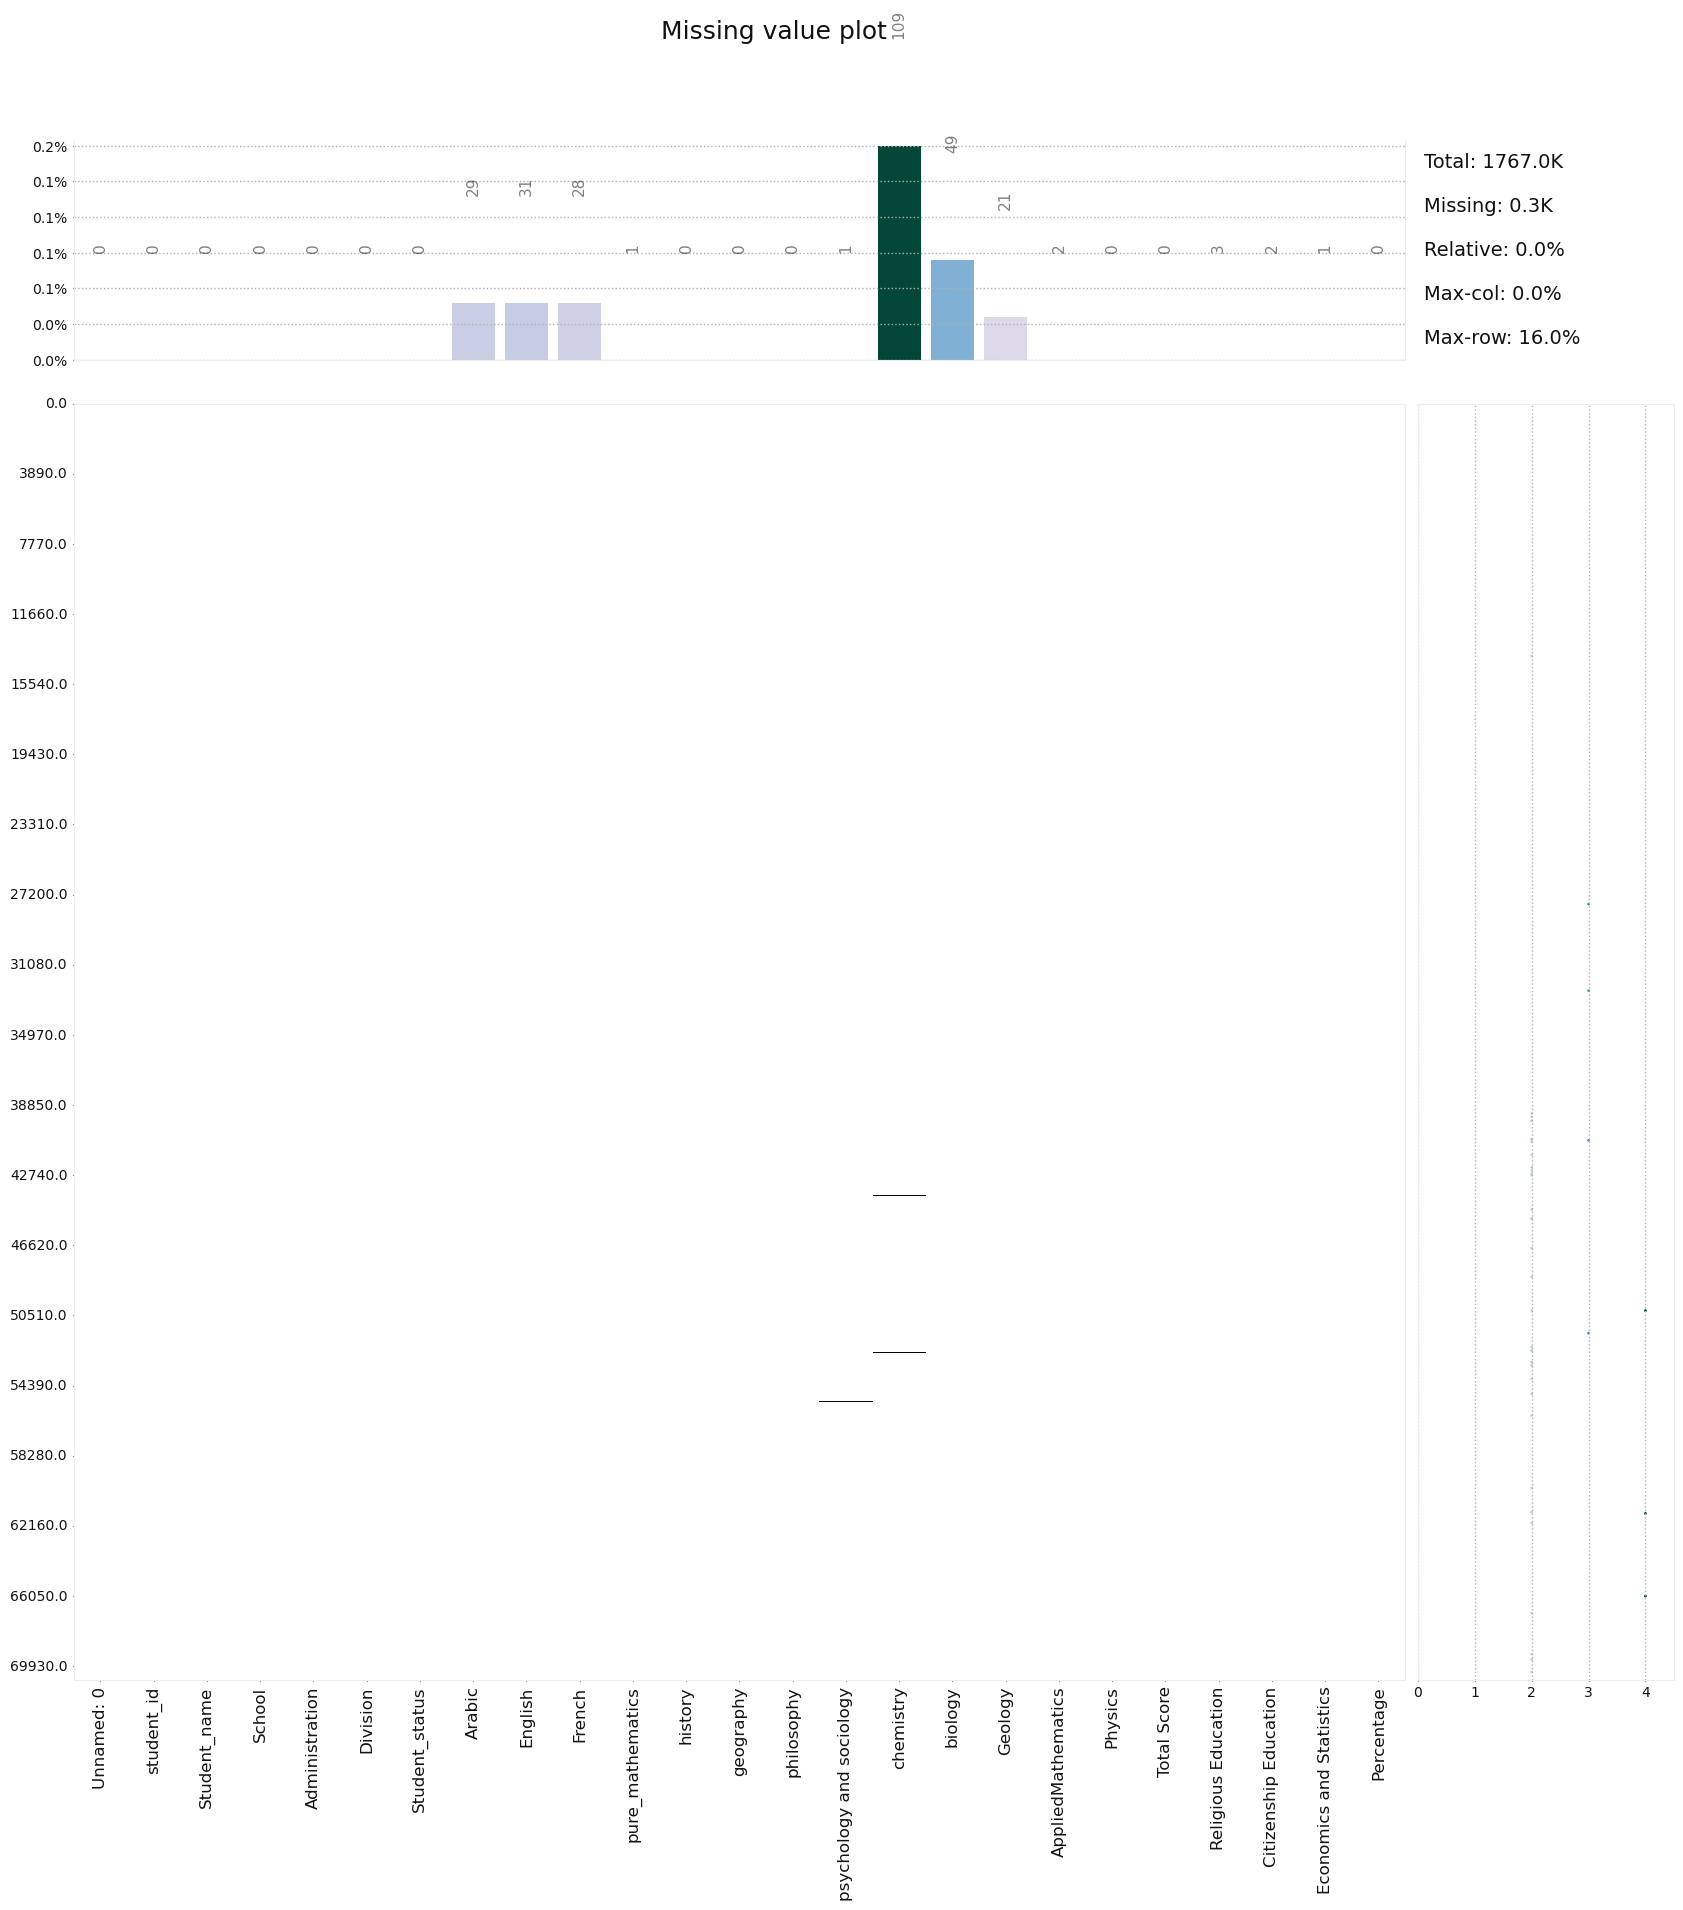

In [13]:
missing_data(df)

<h5>show the rows of null value </h5>

In [16]:
pd.set_option('display.max_columns', None)
df[df.isnull().any(axis=1)]

,Unnamed: 0,student_id,Student_name,School,Administration,Division,Student_status,Arabic,English,French,pure_mathematics,history,geography,philosophy,psychology and sociology,chemistry,biology,Geology,AppliedMathematics,Physics,Total Score,Religious Education,Citizenship Education,Economics and Statistics,Percentage
1232,1232,1007640,جني اشرف شكري محمد,الطلائع الاسلامية خ لغات بنات,الدقى,علمي علوم,راسب دور أول,غائب,48.5,غائب,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,45.5,NaN,غائب,غير مقرر,غائب,94.0,23,23,30,22.93
9735,698,1020028,ندي حسن ابراهيم السيد,الاورمان ع ث بنات,العجوزة,علمي علوم,راسب دور أول,59,غائب,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,12,NaN,غائب,غير مقرر,غائب,111.0,17,21,30,27.07
9788,751,1020083,حنين جمال عبدالعزيز جوده,الاورمان ع ث بنات,العجوزة,علمي علوم,راسب دور أول,58,NaN,غائب,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غائب,30,41,غير مقرر,غائب,129.0,13,20,31,31.46
10702,1665,1020838,ورود اسامه اسماعيل نصر درويش,القومية ث خ م بنات,العجوزة,علمي علوم,راسب دور أول,مؤجل,غائب,غائب,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غائب,NaN,غائب,غير مقرر,غائب,0.0,21,24,33,0.00
13144,4107,1023809,محمد محمد عبدالهادي عبدالفتاح,الشهيد عقيد أ.ح/عاصم محمد عصام الدين عبدالرحمن...,الهرم,علمي علوم,راسب دور أول,51.5,43,NaN,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غائب,غائب,42.5,غير مقرر,غائب,137.0,17,19,25,33.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68759,12297,1094658,احمد رمضان محمود منصور,خدمات فصول الحامولى ث بنين,يوسف الصديق,علمي علوم,راسب دور أول,غائب,غائب,غائب,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غائب,NaN,غائب,غير مقرر,غائب,0.0,20,14,25,0.00
68798,12336,1094726,عمر احمد ابوزيد عثمان,خدمات الشهيد احمد عبد العاطى ث بنين,سنورس,علمي علوم,راسب دور أول,9,NaN,6,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,8,4,15,غير مقرر,7,49.0,13,13,6,11.95
69280,12818,1096685,ميمونه السيد عبدالوهاب الامام,منازل ادارة 6 اكتوبر بنات,أكتوبر,أدبي,راسب دور أول,41.5,9,20,غير مقرر,14,30,31,30,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,175.5,NaN,NaN,25,42.80
69569,13107,1097430,اسراء ابراهيم نورالدين رجب,منازل ادارة ابو النمرس بنات,ابو النمرس,علمي علوم,راسب دور أول,غائب,NaN,39,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,NaN,غائب,غائب,غير مقرر,2,41.0,19,14,غائب,10.00


> - we find some null value it about `277` 
> - and the fact that the missing value is `0.3K`, which is `0.3%` of the total `1767.0k` values.
> - Here are some possible reasons for the null values 
>      -  The students did not take the test because they were absent or ill.





<h5>check about the duplicated data </h5>

In [17]:
df.duplicated().sum()

0

<h2 style="color : yellow">Explore the data </h2>

In [19]:
df.head()

,Unnamed: 0,student_id,Student_name,School,Administration,Division,Student_status,Arabic,English,French,pure_mathematics,history,geography,philosophy,psychology and sociology,chemistry,biology,Geology,AppliedMathematics,Physics,Total Score,Religious Education,Citizenship Education,Economics and Statistics,Percentage
0,0,1002330,ابراهيم سعيد محمد فرج,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,48,25,31.0,غير مقرر,30,30,30.0,30,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,224.0,20.0,13.0,26,54.63
1,1,1002331,احمد حسام السيد حارون,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,56,41,40.0,غير مقرر,31,41,36.0,39,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,284.0,18.0,18.0,32,69.27
2,2,1002332,احمد صلاح حسن احمد جعفر,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,53,25,37.0,غير مقرر,30,30,30.0,31,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,236.0,20.0,18.0,28,57.56
3,3,1002333,توفيق محمد توفيق مهران قاسم,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,79,37,38.0,غير مقرر,46,58,57.0,44,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,359.0,17.0,20.0,29,87.56
4,4,1002334,زياد حسن محمد احمد,النور ث للمكفوفين بالجيزة بنين,الدقى,أدبي,ناجح,65,36,40.0,غير مقرر,30,37,40.0,38,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,286.0,16.0,19.0,27,69.76


<h3 style="color: blue ">student_name<h3>
<ul>
<li style="font-size: 15px"> categorical columns</li>
<li style="font-size: 15px"> not have missing value </li>
</ul>

In [20]:
df['Student_name'].dtypes

dtype('O')

In [21]:
df['Student_name'].isnull().sum()

0

<h3 style="color: blue ">School<h3>
<ul>
<li style="font-size: 15px"> categorical columns</li>
<li style="font-size: 15px"> it have <b style="color : yellow"> 913 </b> unique value </li>
<li style="font-size: 15px"> not have a missing value  </li>
</ul>

In [22]:
df.School.nunique()

913

In [23]:
df['School'].isnull().sum()

0

In [24]:
first_50_school=df['School'].value_counts().sort_values(ascending=False)[:50]
school_name=first_50_school.index
school_name
school_value=first_50_school.values
fig=px.bar(x=school_name,y=school_value,color=school_value)
fig.update_layout(
    title='distribution of the 50 hight school',
    xaxis_title='school',
    yaxis_title='count',
)

<h3 style="color: blue ">Administration<h3>
<ul>
<li style="font-size: 15px"> categorical columns</li>
<li style="font-size: 15px"> it have 46 unique value </li>
<li style="font-size: 15px"> not have a missing value  </li>
</ul>

In [25]:
df.Administration.head()

0    الدقى
1    الدقى
2    الدقى
3    الدقى
4    الدقى
Name: Administration, dtype: object

In [26]:
df['Administration'].nunique()

46

In [27]:
df.Administration.isnull().sum()

0

In [28]:
Administration=df['Administration'].value_counts().sort_values(ascending=False)
Administration_name=Administration.index

Administration_value=Administration.values
fig=px.bar(x=Administration_name,y=Administration_value,color=Administration_value)
fig.update_layout(
    title='distribution of Administration',
    xaxis_title='Administration',
    yaxis_title='count',
)

<h3 style="color: blue ">Division<h3>
<ul>
<li style="font-size: 15px"> categorical columns</li>
<li style="font-size: 15px"> it have 7 unique value </li>
<li style="font-size: 15px"> not have a missing value  </li>
<li style="font-size: 15px"> from this 7 unique value we should have 3 unique value   </li>
<li style="font-size: 15px"> the data of <b style="color: yellow">undefined</b> can't help me so we can drop this rows</li>
<li style="font-size: 15px"> The final form of a column must contain three values:</li>
    <ol>
        <li style="font-size: 12px;color: yellow">Scientific Science</li>
        <li style="font-size: 12px;color: yellow">Mathematical Sciences</li>
        <li style="font-size: 12px;color: yellow">Literary</li>
    </ol>

</ul>

In [30]:
df.Division.unique()

array(['أدبي', ' أدبي', 'علمي علوم', 'علمي رياضة', ' علمي علوم',
       ' علمي رياضة', ' غير محدد'], dtype=object)

In [31]:
df.Division.nunique()

7

In [32]:
df.Division.isnull().sum()

0

In [33]:
df[df['Division']==' غير محدد']

,Unnamed: 0,student_id,Student_name,School,Administration,Division,Student_status,Arabic,English,French,pure_mathematics,history,geography,philosophy,psychology and sociology,chemistry,biology,Geology,AppliedMathematics,Physics,Total Score,Religious Education,Citizenship Education,Economics and Statistics,Percentage
460,460,1002970,محمد هشام مصطفي الشعراوي,الالمانية الانجيلية خ بنين (ابيتور),الدقى,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,13,15,غير مقرر,0.0
461,461,1002975,يوسف حازم علي شيحه,الالمانية الانجيلية خ بنين (ابيتور),الدقى,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,16,14,غير مقرر,0.0
462,462,1003001,فريده حسام الدين محمود ماهر,الالمانية الانجيلية خ بنات (ابيتور),الدقى,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,17,19,غير مقرر,0.0
463,463,1003016,ناديه احمد خليل ابراهيم حسنين,الالمانية الانجيلية خ بنات (ابيتور),الدقى,غير محدد,راسب دور ثاني,غائب,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,غائب,13,غير مقرر,0.0
464,464,1003053,احمد شريف حلمي احمد عيسوي,نارمر ث خ لغات بنين(I.G.C.S.E),الدقى,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,13,19,غير مقرر,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,548,1004520,محمد محمود احمد خليفه اسماعيل,كابيتال الدولية (دبلومة امريكية) بنين,حدائق أكتوبر,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,21,20,غير مقرر,0.0
549,549,1004605,انس عماد محمود عبدالرحمن,مهارات سوبر جلوبال (I.G.C.S.E) بنين,الشيخ زايد,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,14,22,غير مقرر,0.0
550,550,1004632,وعد احمد محمد مصطفي عوض الله,مهارات سوبر جلوبال (I.G.C.S.E) بنات,الشيخ زايد,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,14,19,غير مقرر,0.0
1102,1102,1002970,محمد هشام مصطفي الشعراوي,الالمانية الانجيلية خ بنين (ابيتور),الدقى,غير محدد,راسب دور ثاني,40,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,غير مقرر,0.0,13,15,غير مقرر,0.0


In [34]:
Division=df['Division'].value_counts().sort_values(ascending=False)
Division_name=Division.index

Division_value=Division.values
fig=px.pie(names=Division_name,values=Division_value)
fig.update_layout(
    title='distribution of Division')
fig.show()

<h3 style="color: blue ">Student_status<h3>
<ul>
<li style="font-size: 15px"> categorical columns</li>
<li style="font-size: 15px"> it have 4 unique value </li>
<li style="font-size: 15px"> not have a missing value  </li>
<li style="font-size: 15px"> imbalanced data   </li>
    <ol>
        <li style="font-size: 12px;color: yellow">ناجح = 89.887100</li>
        <li style="font-size: 12px;color: yellow">راسب دور أول = 9.883704</li>
        <li style="font-size: 12px;color: yellow">راسب دور ثاني  = 0.148553</li>
        <li style="font-size: 12px;color: yellow">ناجح دور ثاني = 0.080643</li>
    </ol>
</ul>

In [35]:
df['Student_status'].unique()

array(['ناجح', 'ناجح دور ثاني', 'راسب دور ثاني ', 'راسب دور أول'],
      dtype=object)

In [36]:
df['Student_status'].value_counts(normalize=True)*100

Student_status
ناجح              89.887100
راسب دور أول       9.883704
راسب دور ثاني      0.148553
ناجح دور ثاني      0.080643
Name: proportion, dtype: float64

In [37]:
df['Student_status'].isnull().sum()

0

In [38]:
def plot_pie_barchar(df,var,title=''):
    plt.figure(figsize=(25,10))

    #pie chart (left subplot)
    plt.subplot(121)
    label_list=list(df[var].value_counts().index)
    colors=sns.color_palette('Set2',len(label_list))

    #use the 'pastel' color palette
    _, _, autopcts = plt.pie(df[var].value_counts(),
autopct="%1.1f%%", colors=colors,startangle=90,labels=label_list,wedgeprops={"linewidth": 2,"edgecolor": "white"},shadow=True, textprops={'fontsize': 20})

    plt.title(f"Distribution of {var} variable{title}",fontsize=25)
    # extract percentage value from autopcts
    percentage_values=[float(p.get_text()[:-1]) for p in autopcts]
    print("percentage values :")
    for label,percentage in zip(label_list,percentage_values):
        print(f'{label} = {percentage:.2f}%')
    plt.subplot(122)
    ax=df[var].value_counts().plot(kind='barh',color=colors,
                                    alpha=0.8)
    for i ,j in enumerate(df[var].value_counts().values):
        ax.text(.7,i,j,weight='bold',fontsize=20)
    plt.title(f'count of {var} cases {title}',fontsize=25)
    value_counts=df[var].value_counts()
    print('count values:')
    print(value_counts)
    plt.show()

percentage values :
ناجح = 89.90%
راسب دور أول = 9.90%
راسب دور ثاني  = 0.10%
ناجح دور ثاني = 0.10%
count values:
Student_status
ناجح              63534
راسب دور أول       6986
راسب دور ثاني       105
ناجح دور ثاني        57
Name: count, dtype: int64


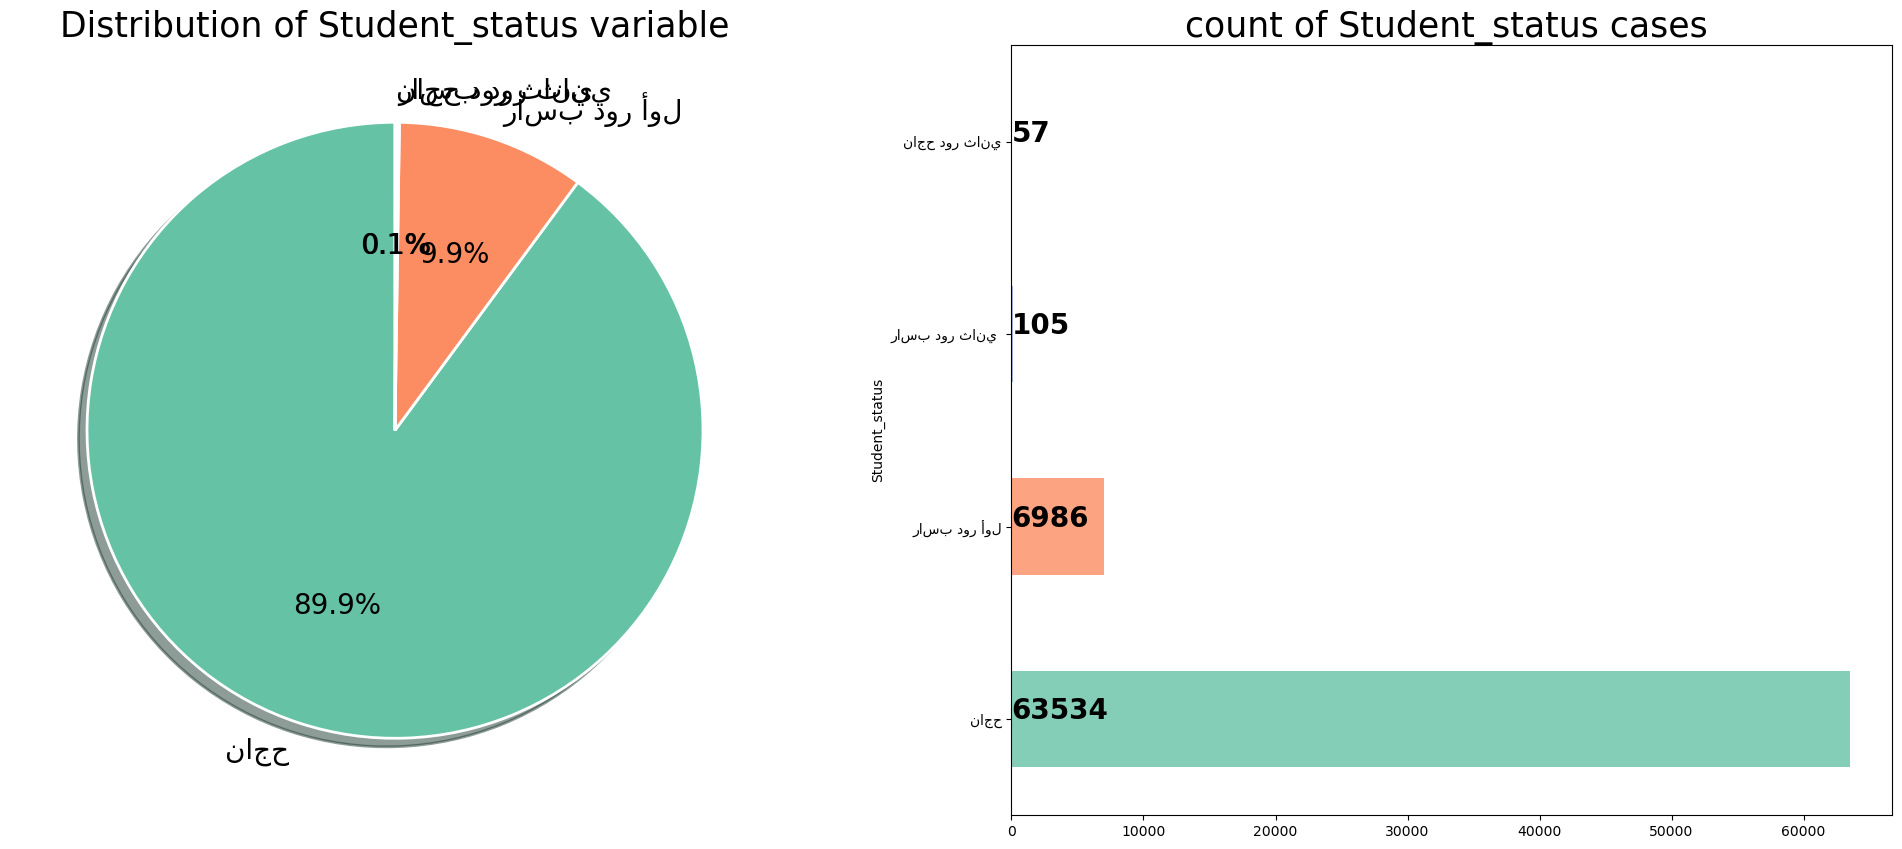

In [39]:
plot_pie_barchar(df,'Student_status')

<h2 style="color: blue ">next step we will take a bout the subjects<h2>
<p style="font-size: 17px"> Arabic   </p>
<ul>
<li style="font-size: 15px"> Arabic is one of the basic subjects in which students in all subjects must be examined </li>
<li style="font-size: 15px"> It should be a numerical columns but we scraping this as as text </li>
<li style="font-size: 15px"> unique value is <b style="color : yellow">174</b></li>
<li style="font-size: 15px"> it have a   missing value <b style="color : yellow">22</b> </li>
<li style="font-size: 15px"> There are some values in the data, such as <b style="color : yellow">absent</b> or <b style="color : yellow"> deferred </b> </li>
<li style="font-size: 15px"> count of <b style="color : yellow">absent</b> is 652 </li>
<li style="font-size: 15px"> count of <b style="color : yellow"> deferred </b> is 3 </li>

</ul>


In [40]:
df['Arabic'].unique()

array(['48', '56', '53', '79', '65', '71', '75', '74', '50', '70', '52',
       '46', '44', '69', '72', '66', '64', '67', '54', '40', '62', '57',
       '58', '60', '61', '63', '41', '73', '59', '68', '51', '47', '78',
       '43', '76', '55', '77', '45', '42', '49', 'غائب', '46.5', '42.5',
       '40.5', '51.5', '56.5', '68.5', '63.5', '74.5', '62.5', '72.5',
       '69.5', '52.5', '60.5', '61.5', '48.5', '64.5', '70.5', '73.5',
       '55.5', '49.5', '54.5', '53.5', '75.5', '65.5', '45.5', '59.5',
       '43.5', '41.5', '57.5', '67.5', '50.5', '47.5', '66.5', '58.5',
       '71.5', '55.0', '59.0', '57.0', '62.0', '61.0', '58.0', '51.0',
       '40.0', '76.5', '46.0', '64.0', '72.0', '63.0', '74.0', '54.0',
       '73.0', '69.0', '66.0', '50.0', '79.5', '77.5', '71.0', '68.0',
       '56.0', '52.0', '53.0', '43.0', '49.0', '42.0', '48.0', '77.0',
       '70.0', '65.0', '45.0', '75.0', '18.5', '41.0', '44.5', '4', '1',
       '21', '28.5', '23.5', '18', '60.0', '44.0', '67.0', '17.0', 

In [41]:
df['Arabic'].isnull().sum()

29

In [42]:
df['Arabic'].nunique()

178

In [43]:
df.query("Arabic=='غائب'").count()[0]

796

In [44]:
df.query("Arabic=='مؤجل'").count()[0]

3

<h3 style="color: blue ">chemistry<h3>
<ul>
<li style="font-size: 15px"> chemistry is one of the basic subjects in which students in all subjects must be examined </li>
<li style="font-size: 15px"> It should be a numerical columns but we scraping this as as text </li>
<li style="font-size: 15px"> it have a   missing value  </li>
<li style="font-size: 15px"> There are some values in the data, such as <b style="color : yellow">absent</b> or <b style="color : yellow"> deferred </b> or  <b style="color : yellow">unscheduled</b>  </li>
<li style="font-size: 15px"> the count of <b style="color : yellow"> undecided</b> is 19950 </li>
<li style="font-size: 15px">The meaning of the presence of an <b style="color : yellow"> undecided</b> value is that it is not in the scientific section and that it is in the literary section </li>
</ul>

In [46]:
df['chemistry'].unique()

array(['غير مقرر', '30', '52', '58', '57', '47', '36', '39', '55', '49',
       '33', '51', '45', '53', '18', '32', '54', '31', '50', 'غائب', '40',
       '42', '34', '41.5', '34.5', '36.5', '31.5', '37.5', '43', '42.5',
       '37', '32.5', '38.5', '45.5', '41', '46.5', '47.5', '33.5', '30.5',
       '51.5', '44.5', '39.5', '38', '35', '48', '13', '54.5', '49.5',
       '35.5', '48.5', '44', '43.5', '40.5', '55.5', '56', '59', '57.5',
       '10', '56.5', '46', '11.5', '8', '12', '14', '52.5', '59.5', '60',
       '12.5', '13.5', '7', '50.5', '53.5', '9', '14.5', '11', '58.5',
       '10.5', '6.5', '35.0', '30.0', '14.0', '48.0', '40.0', '34.0',
       '42.0', '49.0', '39.0', '46.0', '13.0', '32.0', '31.0', '36.0',
       '47.0', '52.0', '33.0', '44.0', '53.0', '41.0', '3', '7.5', '9.5',
       '6', '8.5', nan, '5', '2', '4', '1', '4.5', '2.5', '1.5', '3.5',
       '0.5', '5.5', 'ملغى'], dtype=object)

In [47]:
df[df['chemistry']=='غير مقرر'].count()[0]

27812

<h3 style="color: blue ">Total Score<h3>
<ul>
<li style="font-size: 15px"> numerical dtype  </li>
<li style="font-size: 15px"> it not have null value </li>
<li style="font-size: 15px"> mean of total score is <b style="color : yellow">271.48</b> </li>
<li style="font-size: 15px"> std of total score is <b style="color : yellow">0</b> </li>
<li style="font-size: 15px"> max value of total score  <b style="color : yellow">404.0</b> </li>
<li style="font-size: 15px"> min value of total score  <b style="color : yellow">404.0</b> </li>
<li style="font-size: 15px"> The distribution is slightly skewed to the left, with a kurtosis of 3.51. </li>
<li style="font-size: 15px">  This means that there are more students with lower scores than higher scores, and the distribution has a fatter tail than a normal distribution. </li>


</ul>

In [49]:
df['Total Score'].max(),df['Total Score'].min()

(404.0, 0.0)

In [50]:
df['Total Score'].isnull().sum()

0

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


c:\Users\Ebrahim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='Total Score', ylabel='Density'>

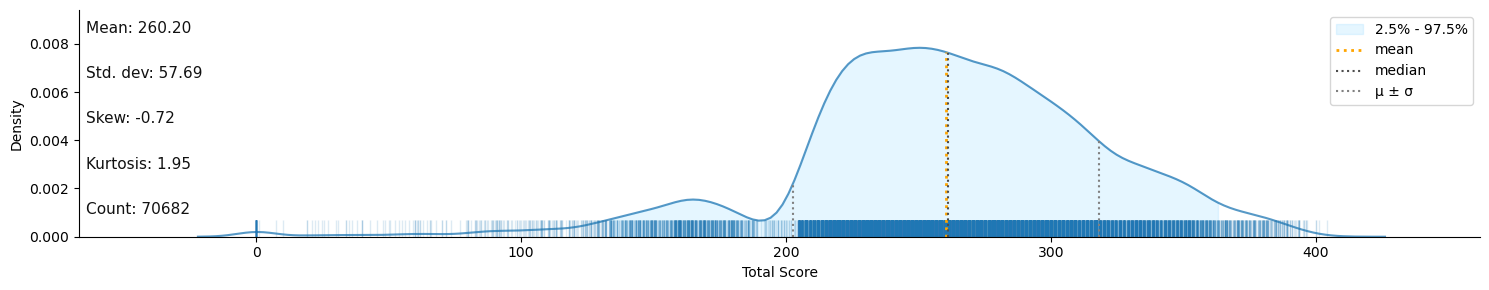

In [51]:
klib.dist_plot(df['Total Score'])

In [52]:
px.box(df,'Total Score')

<h3>and last thing is the <b style="color : yellow"> Percentage </b> column  </h3>
<ul>
    <li style= "font-size : 14px"  > float dtype </li>
    <li style= "font-size : 14px"  > mean is <b style="color:yellow">66.215695</b> </li>
    <li style= "font-size : 15px"  > data is approximately normally distributed </li>
    <li style= "font-size : 15px"  >a mean of <b style="color:yellow">66.22</b>  and a standard deviation of   <b style="color:yellow">13.28</b></li>
    <li style= "font-size : 15px"  >The distribution is slightly skewed to the left, with a kurtosis of <b style="color:yellow">3.51</b>. This means that there are more data points with lower values than higher values, and the distribution has a fatter tail than a normal distribution.</li>

    

</ul>

In [54]:
df['Percentage'].describe()

count    70682.000000
mean        63.463275
std         14.070843
min          0.000000
25%         55.850000
50%         63.660000
75%         72.440000
max         98.540000
Name: Percentage, dtype: float64

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


c:\Users\Ebrahim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Axes: xlabel='Percentage', ylabel='Density'>

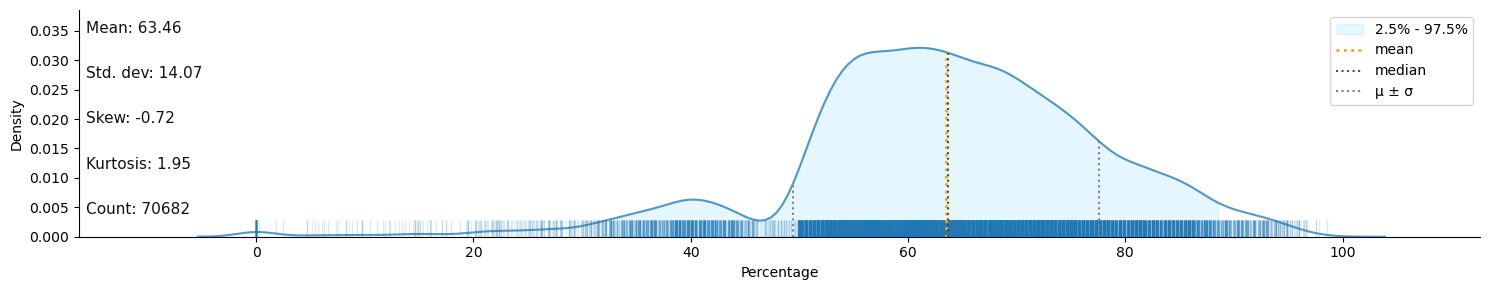

In [55]:
klib.dist_plot(df['Percentage'])

In [56]:
px.box(df,'Percentage')

<h1>part three is done</h1>